In [1]:
import numpy as np
import pandas as pd
from fastai.vision import * 
from fastai.metrics import error_rate
import torch.nn as nn

## Preprocessing

In [2]:
path=untar_data(URLs.CIFAR)

In [3]:
batch_size = 64
data = (ImageList.from_folder(path)
    .split_by_rand_pct(valid_pct=0.2)
    .label_from_folder()
    .transform(get_transforms(max_rotate=30, max_zoom=1.1, max_warp=0.26))
    .databunch(bs=batch_size)
    .normalize())

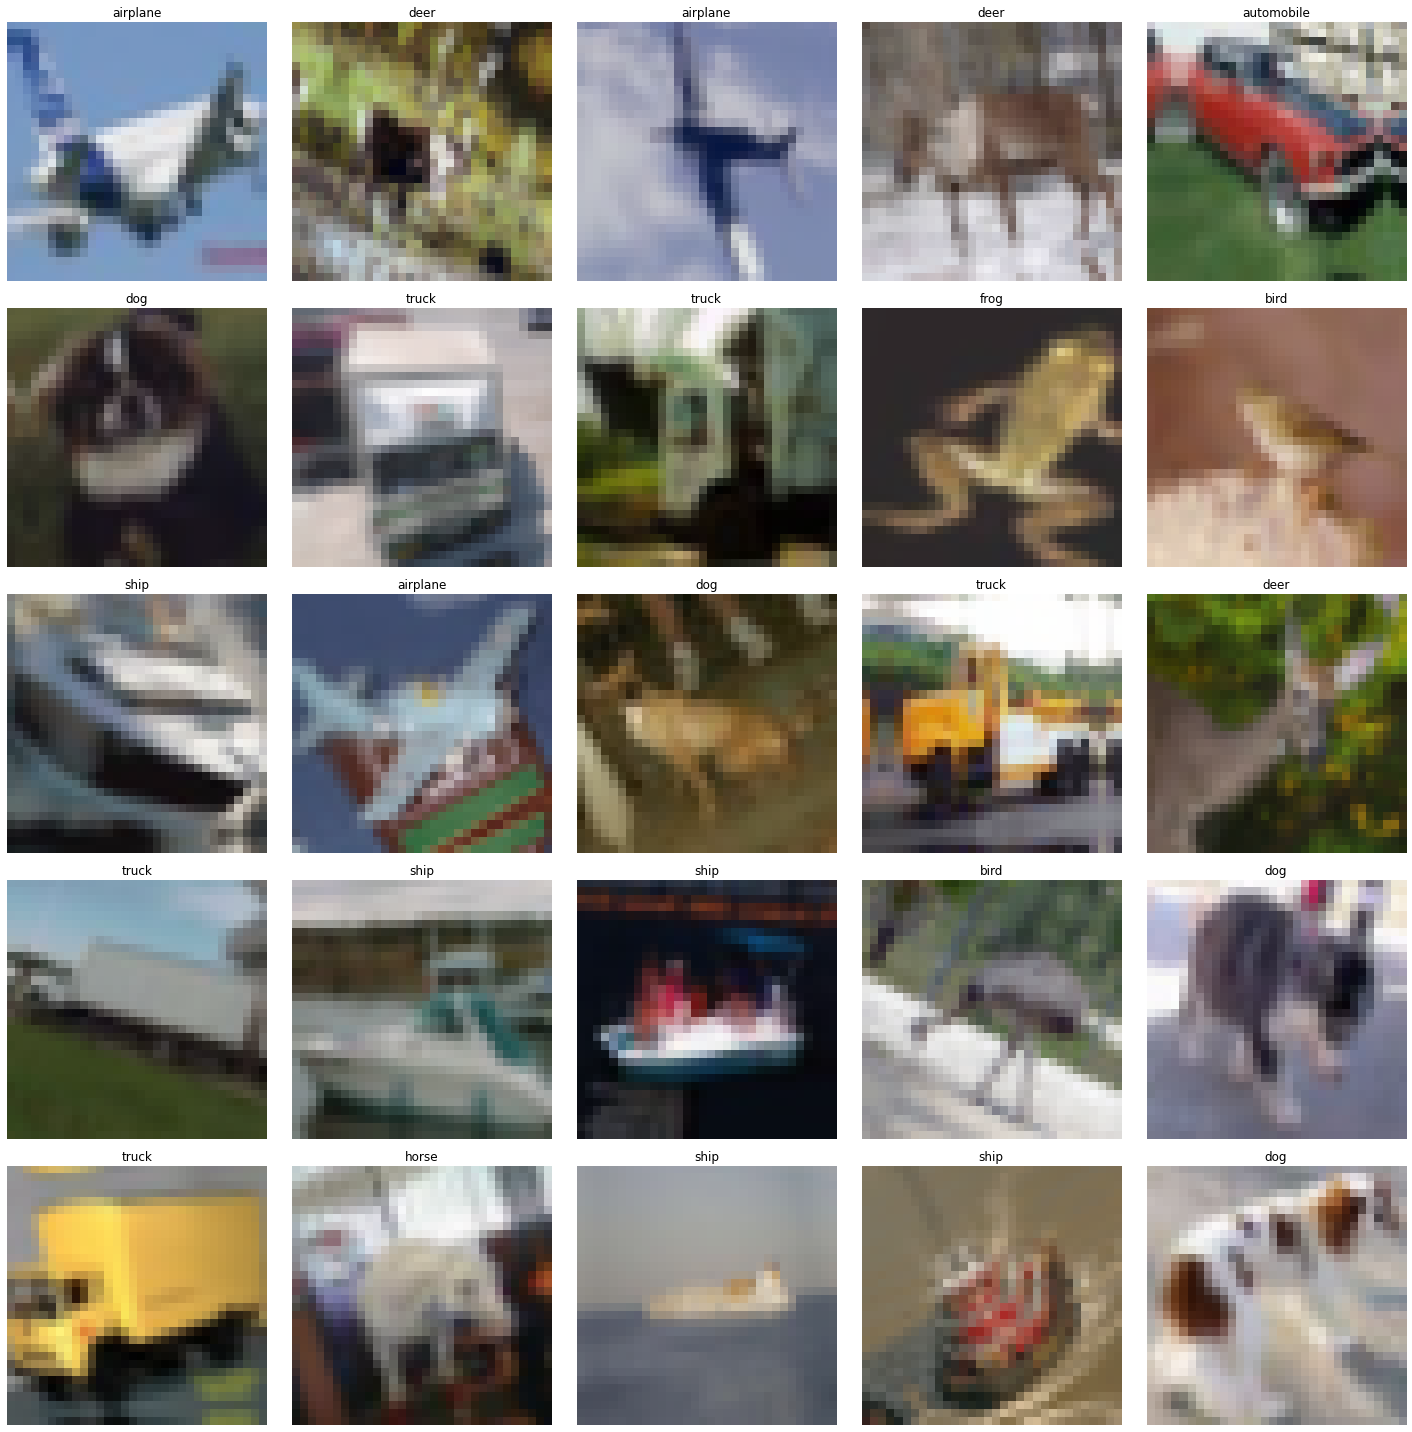

In [4]:
data.show_batch()

In [5]:
data

ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bird,bird,bird,bird,bird
Path: /storage/data/cifar10;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
truck,dog,airplane,frog,dog
Path: /storage/data/cifar10;

Test: None

In [6]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Modeling

In [7]:
learner = cnn_learner(data, base_arch=models.resnet34, metrics=accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.058978,1.581779,0.463500,00:46
1,1.626711,1.382880,0.511167,00:45
2,1.387171,1.152754,0.594667,00:45
3,1.227486,1.034827,0.639833,00:45
4,1.139794,0.943310,0.668500,00:46
5,1.101618,0.900726,0.691750,00:46
6,1.037957,0.853637,0.702000,00:46
7,1.011844,0.830262,0.707667,00:46
8,1.004181,0.836509,0.710167,00:45
9,0.993284,0.837834,0.705417,00:46


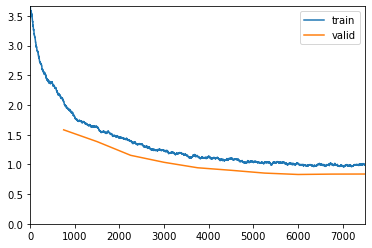

In [8]:
learner.fit_one_cycle(10)

In [9]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.935773,0.771308,0.729583,01:07
1,0.868436,0.730764,0.745500,01:07
2,0.837648,0.714440,0.753167,01:07


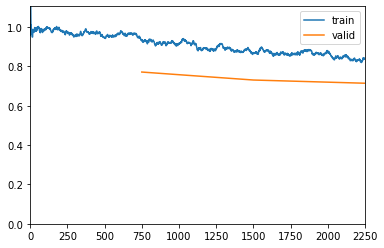

In [10]:
learner.fit_one_cycle(3, max_lr=slice(1e-4))

In [11]:
interp = ClassificationInterpretation.from_learner(learner)

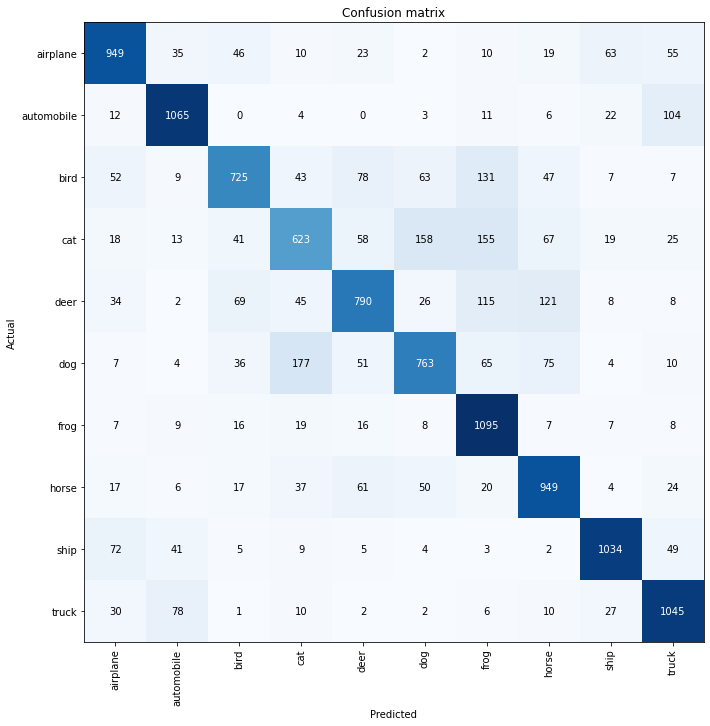

In [12]:
interp.plot_confusion_matrix(figsize=(10,10))

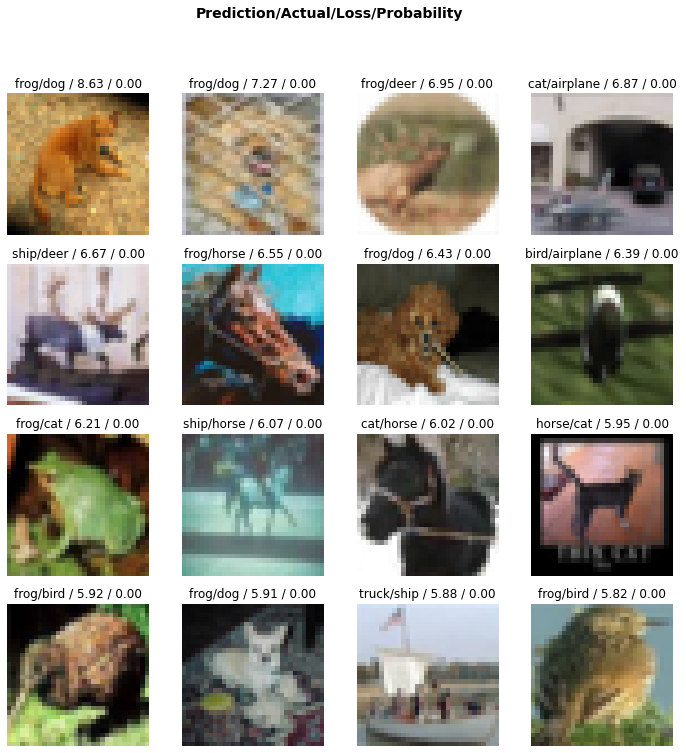

In [13]:
interp.plot_top_losses(16)

In [14]:
interp.most_confused()[:10]

[('dog', 'cat', 177),
 ('cat', 'dog', 158),
 ('cat', 'frog', 155),
 ('bird', 'frog', 131),
 ('deer', 'horse', 121),
 ('deer', 'frog', 115),
 ('automobile', 'truck', 104),
 ('bird', 'deer', 78),
 ('truck', 'automobile', 78),
 ('dog', 'horse', 75)]

## Inference

In [15]:
!curl -o img.jpg https://hrexach.files.wordpress.com/2015/04/red6.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 69022  100 69022    0     0   547k      0 --:--:-- --:--:-- --:--:--  548k


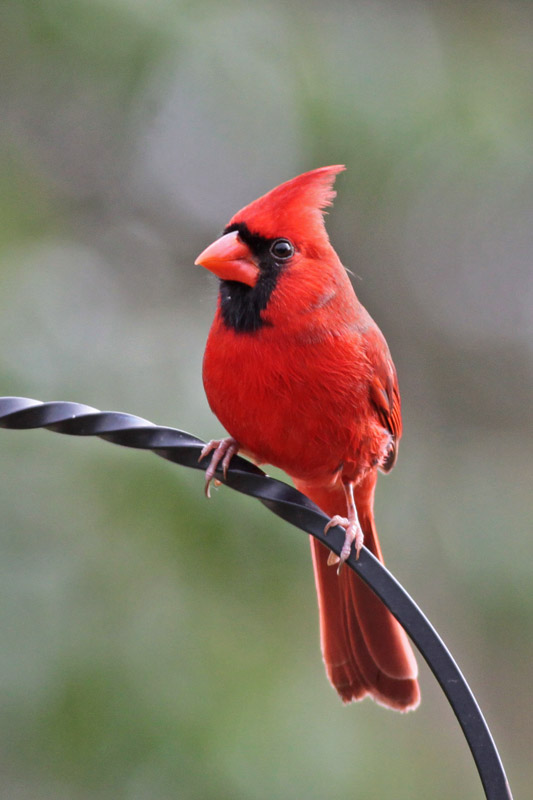

In [16]:
img = open_image('img.jpg')
img

In [17]:
preds = learner.predict(img)

In [18]:
preds

(Category bird,
 tensor(2),
 tensor([5.4585e-15, 2.4064e-18, 5.2156e-01, 1.0110e-10, 1.1238e-12, 4.7844e-01,
         1.4349e-07, 7.3382e-14, 8.9707e-16, 2.4382e-30]))

In [19]:
!curl -o img2.jpg https://i.ytimg.com/vi/vWEiNwxF-ts/maxresdefault.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  105k  100  105k    0     0   268k      0 --:--:-- --:--:-- --:--:--  268k


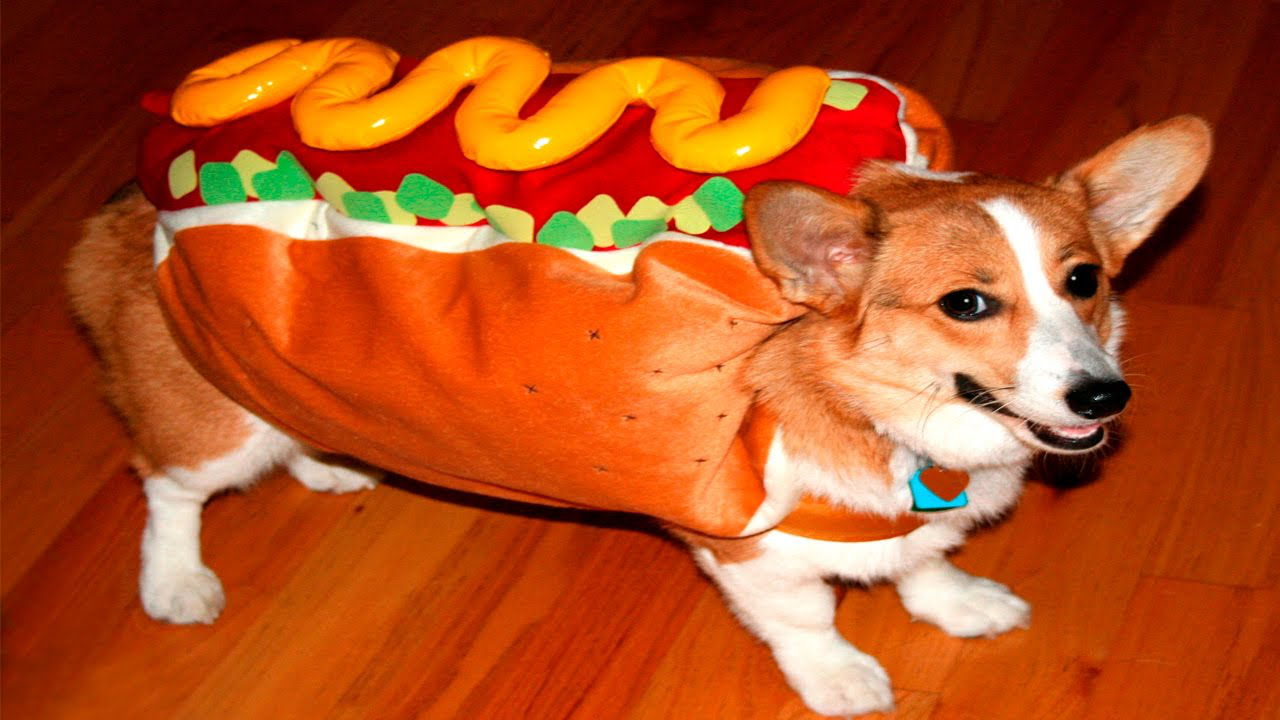

In [20]:
img2 = open_image('img2.jpg')
img2

In [21]:
preds = learner.predict(img2)

In [22]:
preds

(Category dog,
 tensor(5),
 tensor([3.1141e-16, 5.4591e-19, 3.4412e-02, 6.7139e-11, 1.5538e-13, 9.6559e-01,
         6.8870e-07, 1.2139e-13, 1.7222e-16, 1.3321e-29]))

hotdoggy dog